In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from sklearn.gaussian_process import GaussianProcessRegressor

# Guide and Ideas for Capstone Project

We begin this guide by downloading the data:

In [2]:
X = np.load('updated_data/function_3/inputs.npy')
Y = np.load('updated_data/function_3/outputs.npy')

# Upper Confidence Bound

A second alternative would be to use Bayesian Optimization and consider an Upper Confidence Bound acquisition function: 

In [3]:
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

GaussianProcessRegressor()

In [4]:
x1 = np.linspace(0, 1, 100)
dim = 3
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1,dim)

In [5]:
np.max(Y)


-0.0305756837800922

In [6]:
from shared import FormatOutputs, ProbImprovementAF

X_grid = np.array(X_grid)
mean, std = gpr.predict(X_grid, return_std = True)
ucb = mean + 1.96 * std
pi = ProbImprovementAF(mean,std,np.max(Y))

#ucb
idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
FormatOutputs(next_query, "ucb")

#probability of improvemnet
idx_max = np.argmax(pi)
next_query = X_grid[idx_max]
FormatOutputs(next_query, "prob of improvement")

0.999999-0.989899-0.999999: ucb
0.191919-0.222222-0.484848: prob of improvement


## Visualizing our data and thinking of the problem

Reponse Plots

Text(0.5, 1.0, 'X3')

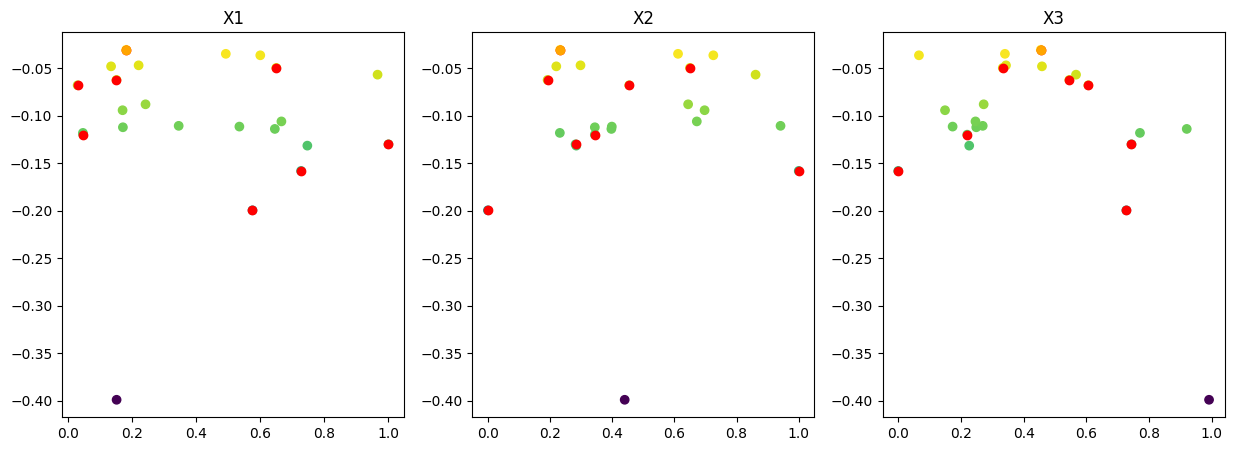

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.scatter(X[:, 0], Y, c = Y)
ax2.scatter(X[:,1], Y, c = Y)
ax3.scatter(X[:,2], Y, c = Y)



from shared import Count_Submissions
ax1.scatter(X[Count_Submissions():, 0], Y[Count_Submissions():], c = 'red')
ax2.scatter(X[Count_Submissions():,1], Y[Count_Submissions():], c = 'red')
ax3.scatter(X[Count_Submissions():,2], Y[Count_Submissions():], c = 'red')

ax1.scatter(X[-1:, 0], Y[-1:], c = 'orange')
ax2.scatter(X[-1:,1], Y[-1:], c = 'orange')
ax3.scatter(X[-1:,2], Y[-1:], c = 'orange')

ax1.set_title("X1")
ax2.set_title("X2")
ax3.set_title("X3")


Section to be used when we want to narrow in on a region

Below we provide code for both: